In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [26]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

Реализуем функцию, определяющую является ли исследуемая временная последовательность стационарной, используя тест Дики-Фуллера

In [135]:
def is_it_stationary(series, treshold=0.05):
    dftest = adfuller(series, autolag='AIC')
    return dftest[1] < treshold, f', p-value = {dftest[1]}'

**1. Sales of company X**

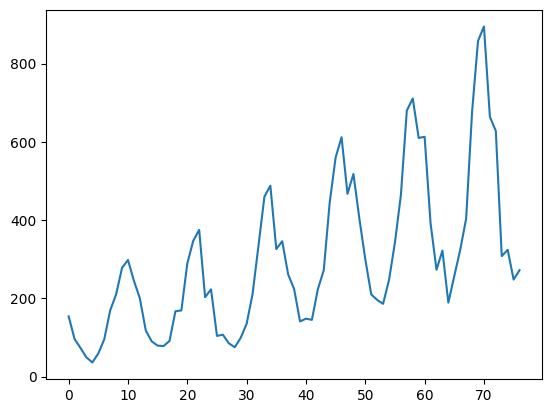

False , p-value = 0.9888894205170052


In [159]:
series = np.array(sales_of_company_x['Count'])
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Как мы видим, имеющаяся последовательность далека от стационарной, р-value = 0.98. Попробуем преобразовать данные следующим образом:
1. снизим разброс дисперсии между значениями с помощью преобразования Бокса-Кокса
2. уберем тренд
3. уберем сезонность

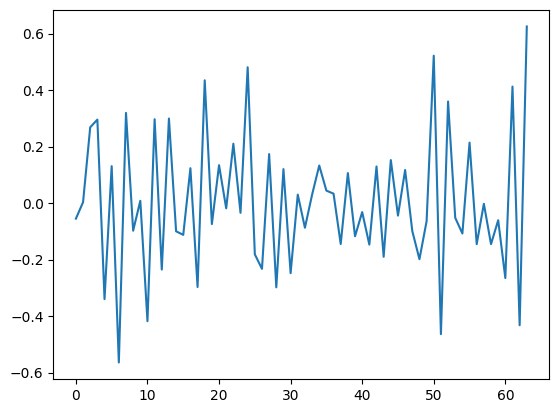

False , p-value = 0.1668454967417849


In [160]:
series = boxcox(series, 0)
series = series[12:] - series[:-12]
series = series[1:] - series[:-1]
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Как мы видим, график стал более похож на график стационарной последовательности, но все равно р-value больше установленного порога равного 0.05. Попробуем поэкспериментровать с трендом и сезонностью.

In [166]:
series = np.array(sales_of_company_x['Count'])
series = boxcox(series, 0)
results = []
for i in range(1, 13):
    for j in range(1, 13):
        subseries = series[i:] - series[:-i]
        subseries = subseries[j:] - subseries[:-j]
        results.append((i, j) + is_it_stationary(subseries))
results = list(filter(lambda x: x[2], results))
results.sort(key=lambda x: x[3])
results[:10]

[(4, 6, True, ', p-value = 0.0'),
 (6, 4, True, ', p-value = 0.0'),
 (3, 3, True, ', p-value = 0.00022397833104522444'),
 (5, 6, True, ', p-value = 0.0005413461435993527'),
 (6, 5, True, ', p-value = 0.0005413461435993527'),
 (4, 12, True, ', p-value = 0.0011019182026669931'),
 (12, 4, True, ', p-value = 0.0011019182026669931'),
 (5, 5, True, ', p-value = 0.0014100049680226589'),
 (2, 8, True, ', p-value = 0.0014445545079975225'),
 (8, 2, True, ', p-value = 0.0014445545079975225')]

Очевидно, наилучшие результаты получаются при дифференцировании исходной последовательности с периодами 4 и 6. Посмотрим, как это будет выглядеть на графике

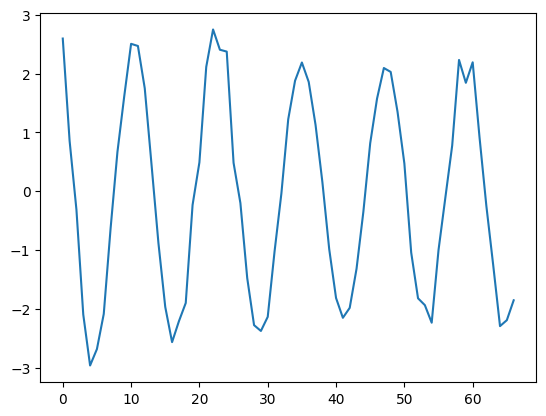

True , p-value = 0.0


In [175]:
series = np.array(sales_of_company_x['Count'])
series = boxcox(series, 0)
series = series[6:] - series[:-6]
series = series[4:] - series[:-4]
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Глядя на данный график, очевидно, что метод Дики-Фуллера сработал некорректно, полученная последовательность нисколько не похожа на шум, а близка к синусоиде. Попробуем проанализировать последовательности, при условии, что период тренда = 12 месяцам.

In [184]:
series = np.array(sales_of_company_x['Count'])
series = boxcox(series, 0)
series = series[12:] - series[:-12]
results = []
for i in range(1, 13):
    subseries = series[i:] - series[:-i]
    results.append((i, ) + is_it_stationary(subseries))
results = list(filter(lambda x: x[1], results))
results.sort(key=lambda x: x[2])
results[:1]

[(4, True, ', p-value = 0.0011019182026669931')]

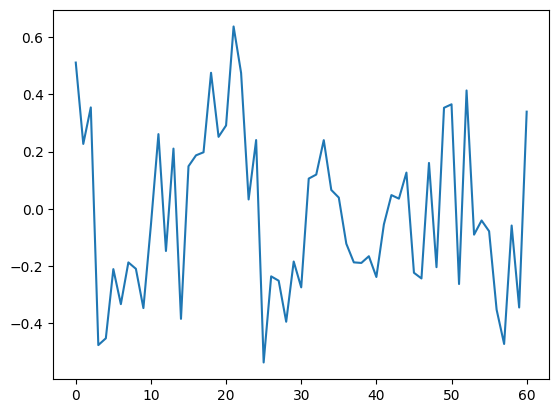

True , p-value = 0.0011019182026669931


In [186]:
series = np.array(sales_of_company_x['Count'])
series = boxcox(series, 0)
series = series[12:] - series[:-12]
series = series[4:] - series[:-4]
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Такая последовательность уже похожа на стационарную, у нее нет тренда и явной сезонности, а все значения относительно равномерно распределены вокруг 0.

**2. Robberies in boston**

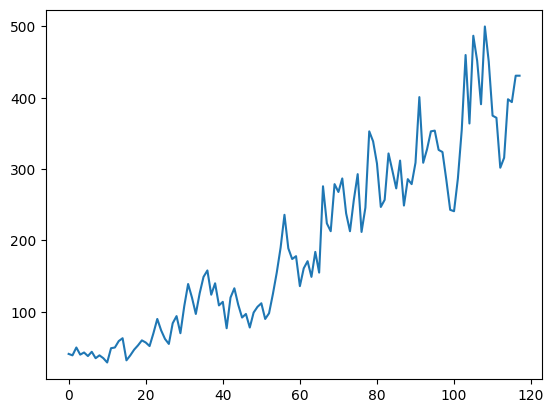

False , p-value = 0.994277563805723


In [187]:
series = np.array(robberies_in_boston['Count'])
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Здесь тоже бросается в глаза тренд, направленный вверх и увеличивающаяся со временем дисперсия, попробуем от них избавиться и получить стационарную последовательность.

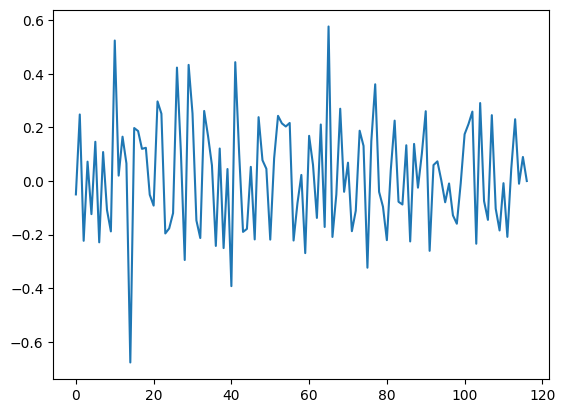

True , p-value = 2.3786024417437596e-11


In [188]:
series = boxcox(series, 0)
series = series[1:] - series[:-1]
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Как мы видим, в данном случае исчезновение тренда и нивилирование дисперсии оказалось достаточно.

**3. Аirlines passengers**

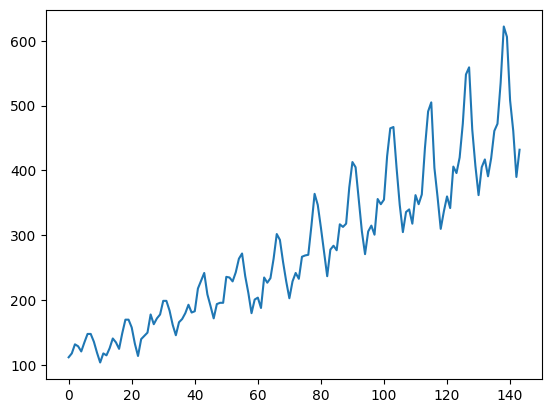

False , p-value = 0.991880243437641


In [189]:
series = np.array(airlines_passengers['Count'])
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

На полученном графике заметны и восходящий тренд, и сезонность и монотонно возрастающая дисперсия, попробуем применить теже методы.

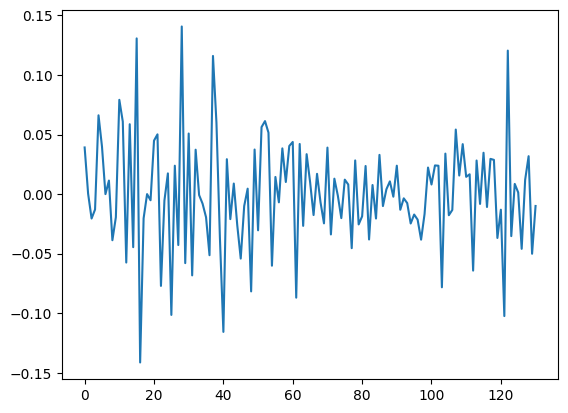

True , p-value = 0.00024859123113838495


In [190]:
series = boxcox(series, 0)
series = series[1:] - series[:-1] #убираем тренд
series = series[12:] - series[:-12] #убираем сезонность
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

**4. mean_monthly_temp**

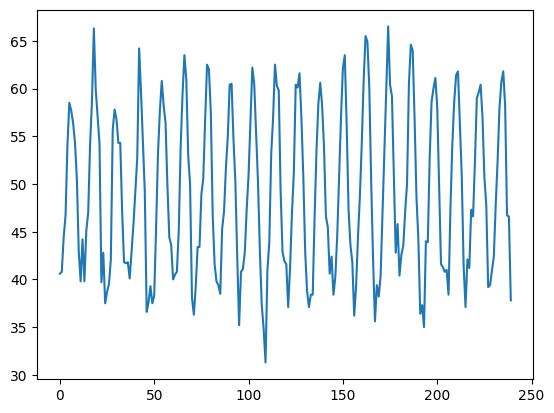

True , p-value = 0.016989030222608604


In [192]:
series = np.array(mean_monthly_temp['Deg'])
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Здесь, несмотря на уже исходное p-value = 0.016, очевидна сезонность изменений, попробуем от нее избавиться.

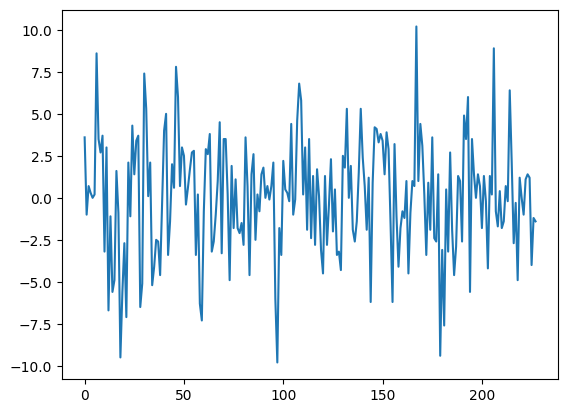

True , p-value = 1.1419453014592132e-07


In [193]:
series = series[12:] - series[:-12] #убираем сезонность
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

**5. dowjones_closing**

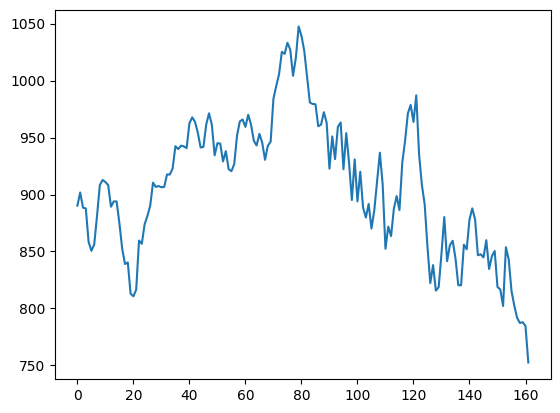

False , p-value = 0.6224548515589733


In [208]:
series = np.array(dowjones_closing['Close'])
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

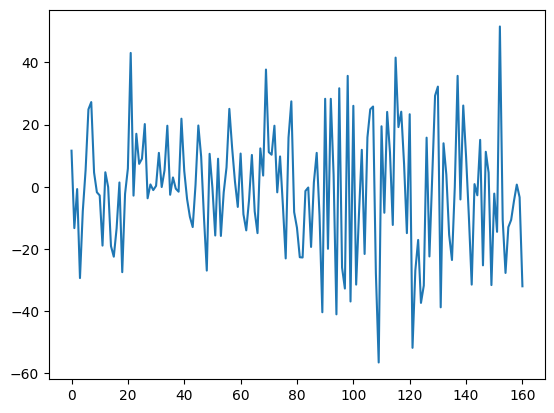

True , p-value = 2.4075864037417794e-24


In [209]:
# посмотрим, есть ли в имеющейся последовательности тренд
series = series[1:] - series[:-1]
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

**6. female_births**

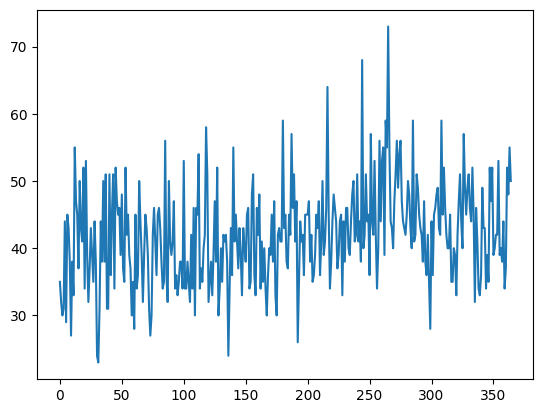

True , p-value = 5.2434129901498554e-05


In [211]:
series = np.array(female_births['Count'])
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Имеющаяся изначальная последовательность, похоже и так стационарна. Посмотрим, что будет, если продифферинцировать ее с периодом в примерно 1 месяц

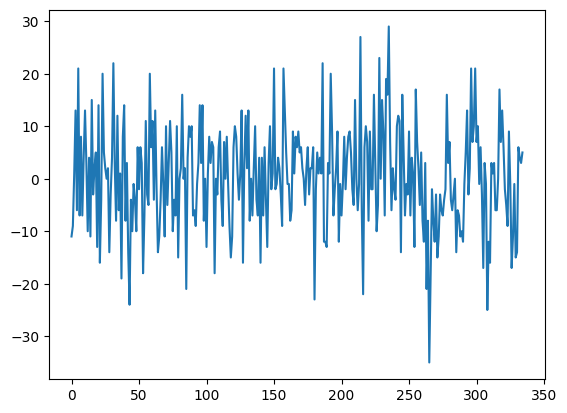

True , p-value = 6.655946990893116e-07


In [214]:
series = series[30:] - series[:-30]
plt.plot(series)
plt.show()
print(*is_it_stationary(series))

Похоже, что есть нкоторая незначительная сезонность с периодом в 1 месяц, поскольку р-value уменьшилась на 2 порядка